In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines, ChipResonatorsThreeTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

Permeability and thickness heterostructure

In [3]:
epsilon_r = [15.18, 16, 15.18, 16, 11.9]
thickness_subs = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]

Feedline

In [4]:
epsilon_r = 11.9
thickness_subs = 500e-6
FeedlineWidth = 52
FeedlineLength  = 5400
FeedlineGap= 20
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 200
BondpadGap = 200*50/80

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=13.5e-12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=13.5e-12, length_CPW=(FeedlineLength + FeedlineTaperLength + BondpadLength)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.26339721808462 Ohm
Frequency of the feedline is 2.1923824876462703 GHz


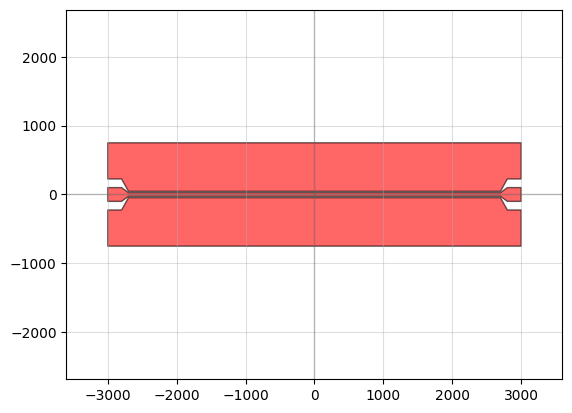

In [5]:
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 1500]

_, _, TLine = ChipTline(ChipSize,
                          FeedlineWidth, 
                          FeedlineLength, 
                          FeedlineGap, 
                          FeedlineTaperLength, 
                          BondpadWidth, 
                          BondpadLength, 
                          BondpadGap)
qp(TLine)
#TLine.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\Tline-2.gds")

In [14]:
from Schuster_Resonators.resonator import SchusterResonatorSmooth


NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*[70]
InductorHorizontalLength = np.ones(NumberOfResonators)*[70]
InductorWidth = np.ones(NumberOfResonators)*0.3
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100


Res, etch = SchusterResonatorSmooth(CapacitorHorizontalLength[0], 
                            CapacitorVerticalLength[0], 
                            CapacitorWidth[0],
                            NumberOfBends[0], 
                            InductorVerticalLength[0],
                            InductorHorizontalLength[0],
                            InductorWidth[0],
                            TaperWidth[0],
                            TaperLength[0],
                            SpacingC0[0], 
                            SpacingCc[0],
                            calib = False, 
                            cap_sim = False
                            )

qp(Res)


# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)


# FeedlineLength = 1500
# ChipSize = [FeedlineLength, 900]

# c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
#                         FeedlineWidth, FeedlineLength, FeedlineGap, 
#                         FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
#                         CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
#                         NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
#                         TaperWidth, TaperLength, SpacingC0, SpacingCc,
#                         FinalSpacingBondpads, MWO_simulation=True)

# chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\juliantryingstuff\tworesonator_indlength_500_2020_width_0.3.gds")
# qp(chip)

TypeError: SchusterResonatorSmooth() missing 1 required positional argument: 'SpacingCc'